# Projet de Machine Learning

On s'intéresse au jeu de données 'Global data on sustainable energy' et plus précisément aux données liées au "Value_co2_emissions_kt_by_country"

On commence par importer les librairies nécessaires au projet ainsi que le jeu de données :

# Importation et visualisation du jeu de données 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('global-data-on-sustainable-energy (1).csv')

data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


On affiche les types des différentes variables, puis on transfome la variable 'Year' en variable qualitative. Aussi, on trouve intéressant de transformer le nom des pays en variable qualitative (category plutôt que object).

In [2]:
data.dtypes

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_em

In [3]:
data["Year"]=pd.Categorical(data["Year"],ordered=False)
data["Entity"]=pd.Categorical(data["Entity"],ordered=False)
data.dtypes

Entity                                                              category
Year                                                                category
Access to electricity (% of population)                              float64
Access to clean fuels for cooking                                    float64
Renewable-electricity-generating-capacity-per-capita                 float64
Financial flows to developing countries (US $)                       float64
Renewable energy share in the total final energy consumption (%)     float64
Electricity from fossil fuels (TWh)                                  float64
Electricity from nuclear (TWh)                                       float64
Electricity from renewables (TWh)                                    float64
Low-carbon electricity (% electricity)                               float64
Primary energy consumption per capita (kWh/person)                   float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          float64

On met en forme les variables du dataset, par exemple dans la densité, certaines variables ont des ',' pour représenter des milliers :

In [6]:
print(data["Density(P/Km2)"][252:255])

data["Density(P/Km2)"] = data["Density(P/Km2)"].apply(lambda x : float(x.replace(',','')) if type(x)==str else x)

print(data["Density(P/Km2)"][252:255])

data.dtypes

252    2239.0
253    2239.0
254    2239.0
Name: Density(P/Km2), dtype: float64
252    2239.0
253    2239.0
254    2239.0
Name: Density(P/Km2), dtype: float64


Entity                                                              category
Year                                                                category
Access to electricity (% of population)                              float64
Access to clean fuels for cooking                                    float64
Renewable-electricity-generating-capacity-per-capita                 float64
Financial flows to developing countries (US $)                       float64
Renewable energy share in the total final energy consumption (%)     float64
Electricity from fossil fuels (TWh)                                  float64
Electricity from nuclear (TWh)                                       float64
Electricity from renewables (TWh)                                    float64
Low-carbon electricity (% electricity)                               float64
Primary energy consumption per capita (kWh/person)                   float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          float64

On va regarder le nombre de valeurs manquantes :

In [7]:
nb_data_missing = data.isna().sum()
taux_data_missing = nb_data_missing/len(data)
print(nb_data_missing)
print()
print(taux_data_missing)

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

On obtient bien que les variables "Renewable-electricity-generating-capacity-per-capita", "Financial flows to developing countries (US $)"et "Renewables (% equivalent primary energy)" comportent le plus de variables manquantes.

In [8]:
data = data.drop(labels=["Renewable-electricity-generating-capacity-per-capita",
                  "Financial flows to developing countries (US $)",
                  "Renewables (% equivalent primary energy)"],
          axis='columns')

data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


On crée un nouveau jeu de données, qui ne comportent pas les trois colonnes précédentes et on supprime également toutes les lignes qui comportent des données manquantes.

On obtient alors un dataframe avec 2868 observations (lignes)

In [12]:
data = data.dropna()
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density(P/Km2),Land Area(Km2),Latitude,Longitude
3,Afghanistan,2003,14.738506,9.50,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.90,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953
5,Afghanistan,2005,25.390894,12.20,33.88,0.34,0.0,0.59,63.440857,252.06912,1.41,1549.999952,11.229715,242.031313,60.0,652230.0,33.93911,67.709953
6,Afghanistan,2006,30.718690,13.85,31.89,0.20,0.0,0.64,76.190475,304.42090,1.50,1759.999990,5.357403,263.733602,60.0,652230.0,33.93911,67.709953
7,Afghanistan,2007,36.051010,15.30,28.78,0.20,0.0,0.75,78.947370,354.27990,1.53,1769.999981,13.826320,359.693158,60.0,652230.0,33.93911,67.709953


# Analyse élémentaire : Statistiques unidimensionnels

On étudie ici les variables sous la forme d'histogrammes, de boxplot et on observe différentes transformations des données pour optimiser leurs affichages.

In [13]:
%matplotlib inline

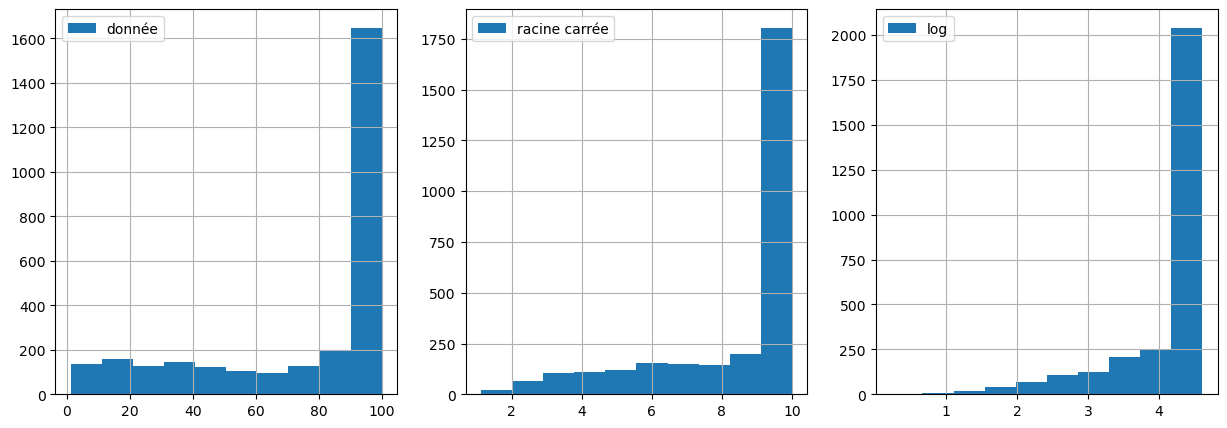

ValueError: supplied range of [-inf, 4.605170185988091] is not finite

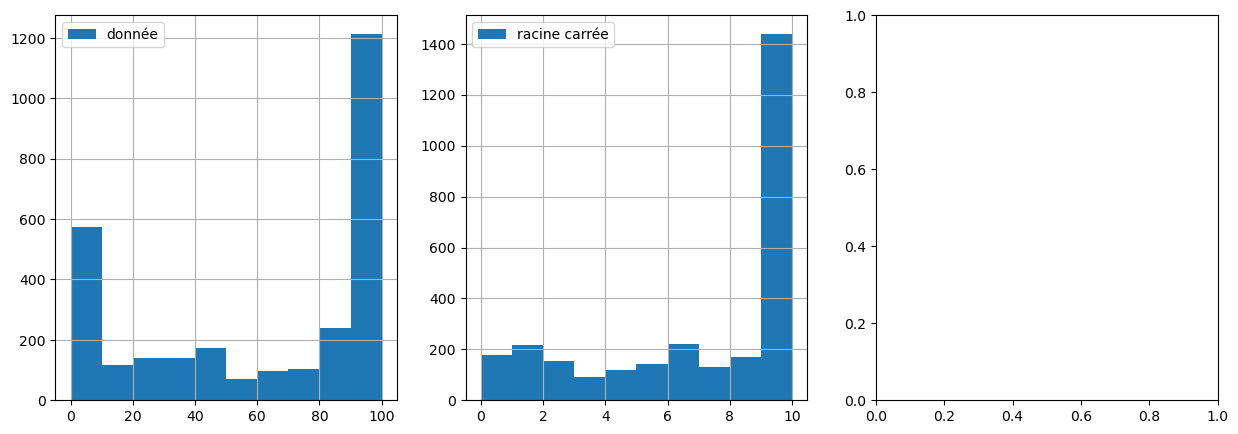

In [50]:
import matplotlib.pyplot as plt
import numpy as np

interesting_columns = ["Access to electricity (% of population)",
                       "Access to clean fuels for cooking",
                       "Renewable energy share in the total final energy consumption (%)",
                       "Electricity from fossil fuels (TWh)",
                       "Electricity from nuclear (TWh)",
                       "Electricity from renewables (TWh)",
                       "Low-carbon electricity (% electricity)",
                       "Primary energy consumption per capita (kWh/person)",
                       "Energy intensity level of primary energy (MJ/$2017 PPP GDP)",
                       "Value_co2_emissions_kt_by_country",
                       "gdp_growth",
                       "gdp_per_capita"]

for column_to_test in interesting_columns :
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    data[column_to_test].hist(label='donnée')
    plt.legend()
    plt.subplot(1,3,2)
    np.sqrt(data[column_to_test]).hist(label='racine carrée')
    plt.legend()
    plt.subplot(1,3,3)
    if not(data[column_to_test].isnull().any()) :
        np.log(data[column_to_test]).hist(label='log')
        plt.legend()
    plt.show()

On affiche également les statistiques descriptives des données pour avoir une idée des moyennes, médiane et quantile. Cela peut notamment nous aider pour savoir vers quelles transformations , il est préférable d'aller .
//A mettre avant les histogrammes

In [39]:
means = data.mean(numeric_only=True)
means.head()

data.describe()

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density(P/Km2),Land Area(Km2),Latitude,Longitude
count,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2.868000e+03,2868.000000,2868.000000,2868.000000,2.868000e+03,2868.000000,2868.000000
mean,76.584630,62.170084,35.802071,76.693556,15.337019,26.603375,39.629403,26082.456843,5.418111,1.688182e+05,3.895326,12577.050921,219.553696,6.581668e+05,18.140402,12.970486
std,31.510371,39.238548,30.024000,374.419806,78.776075,107.640273,34.454884,37097.457254,3.577415,8.180202e+05,4.645613,18730.476190,736.086276,1.705048e+06,24.924975,65.478645
min,1.252269,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.110120,1.030000,3.000000e+01,-36.658153,111.927225,2.000000,2.100000e+01,-40.900557,-175.198242
25%,53.237811,22.075000,9.187500,0.290000,0.000000,0.090000,6.091074,2779.966525,3.280000,2.187500e+03,1.770575,1209.802655,31.000000,2.974300e+04,1.650801,-10.940835
50%,97.000000,81.550000,28.790000,2.995000,0.000000,1.680000,35.009718,11922.761000,4.400000,1.042500e+04,3.788166,4168.110171,83.000000,1.319570e+05,17.060816,18.643501
75%,100.000000,100.000000,60.667500,25.787500,0.000000,10.102500,66.879318,31838.556000,6.140000,5.814500e+04,5.957490,14828.344425,203.000000,4.881000e+05,39.399872,43.679291
max,100.000000,100.000000,96.040000,5098.220000,809.410000,2014.570000,100.000010,262585.700000,32.570000,1.070722e+07,63.379875,123514.196700,8358.000000,9.984670e+06,64.963051,178.065032


boxplot à faire 

In [63]:
emissions_par_pays = data.groupby('Entity')['Value_co2_emissions_kt_by_country'].sum().sort_values(ascending=False)
print(emissions_par_pays)

emissions_par_pays = emissions_par_pays.reset_index() #passer d'une série à uin dataframe

top_5_emission = emissions_par_pays["Entity"][:5]
print(top_5_emission)

Entity
China                               1.527328e+08
United States                       1.065908e+08
India                               3.267958e+07
Japan                               2.367469e+07
Germany                             1.547289e+07
                                        ...     
Saint Lucia                         0.000000e+00
Saint Vincent and the Grenadines    0.000000e+00
Saudi Arabia                        0.000000e+00
Slovakia                            0.000000e+00
Congo                               0.000000e+00
Name: Value_co2_emissions_kt_by_country, Length: 176, dtype: float64
0            China
1    United States
2            India
3            Japan
4          Germany
Name: Entity, dtype: category
Categories (176, object): ['Afghanistan', 'Albania', 'Algeria', 'Angola', ..., 'Vanuatu', 'Yemen', 'Zambia', 'Zimbabwe']
